# Twitter Sentiment Classification Predict 

© Explore AI Academy




### Team JM2 Members
- Nokukhanya Magagula
- Ofentse Maleka
- Rethabile Ntshabele
- Palesa Monau
- Modisaotsile Patrick Masilo
- Lethabo Kgatuke

---

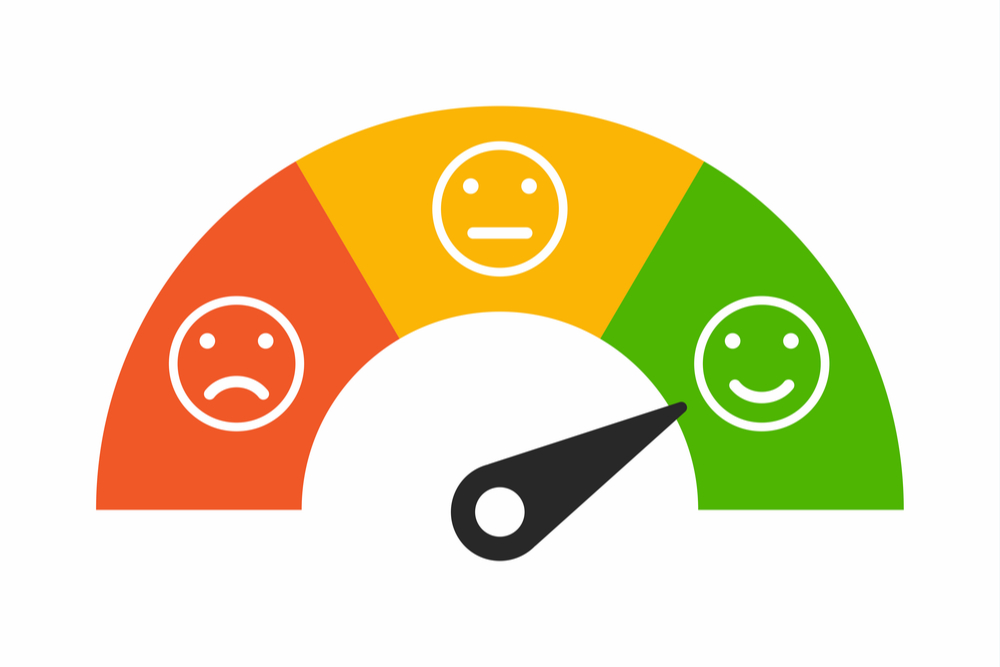

## Introduction

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner.

For this project, climate change is the topic at hand. 

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

What's required for this project is to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

This project aims at providing an accurate and robust solution to this task, giving companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### Dataset Description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

#### Class Description
- 2  &rarr; **News**: the tweet links to factual news about climate change
- 1  &rarr; **Pro**: the tweet supports the belief of man-made climate change
- 0  &rarr; **Neutral**: the tweet neither supports nor refutes the belief of man-made climate change
- -1 &rarr; **Anti**: the tweet does not believe in man-made climate change

#### Features
- **sentiment** &rarr; which class a tweet belongs in (refer to Class Description above), target variable
- **message** &rarr; Tweet body
- **tweetid** &rarr; Twitter unique id

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

- <a href=#three.1>3.1 Target Variable Analysis</a>

- <a href=#three.2>3.2 Tweets Analysis</a>

<a href=#four>4. Data Preprocessing</a>

- <a href=#four.1>4.1 Text Cleaning</a>

- <a href=#four.2>4.2 Stopwords Removal</a>

- <a href=#four.3>4.3 Text Normalization</a>

- <a href=#four.4>4.4 Clean Data Analysis</a>

<a href=#five>5. Feature Engineering</a>

- <a href=#five.1>5.1 Text Feature Extraction</a>

- <a href=#five.2>5.2 Vectorization</a>

<a href=#six>6. Data Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. References</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    


In [48]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="FRnbYP0b4bvjNJuQ2XMV2dhi6",
    project_name="general",
    workspace="classification-2207ftds-team-jm2",
)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/classification-2207ftds-team-jm2/general/a002656c541d4ff989738a2188e942e8
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (102.10 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to

In [67]:
# import packages
import pandas as pd
import numpy as np
from os import makedirs
from os import path
import math
from scipy.sparse import csr_matrix
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

import nltk.downloader
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pydataset import data
from sklearn.ensemble        import BaggingClassifier, \
         ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import RidgeClassifier
from sklearn.svm             import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

import pickle
import json

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

In [68]:
#Loading both the test and the train data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

In [69]:
#Briefly view the data

df_train.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                     message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming an...   
1                             It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s...   
3  #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t....   
4  RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is ...   

   tweetid  
0   625221  
1   126103  
2   698562  
3   573736  
4   466954

In [70]:
df_test.head()

message  \
0  Europe will now be looking to China to make sure that it is not alone in fighting clim...   
1  Combine this with the polling of staffers re climate change and womens' rights and you...   
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yA...   
3  @Karoli @morgfair @OsborneInk @dailykos \r\nPutin got to you too Jill ! \r\nTrump does...   
4         RT @FakeWillMoore: 'Female orgasms cause global warming!'\r\n-Sarcastic Republican   

   tweetid  
0   169760  
1    35326  
2   224985  
3   476263  
4   872928

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In the exploratory data analysis, the following questions will be answered to get insights from the dataset:

- What kind of data is this? (number of columns present & datatypes present in the dataset)
- Are there any missing values?
- Are there any duplicated values
- Is there any relationship between different independent variables of the dataset? If yes then how strong is that relationship?

In [71]:
df_train.shape

(15819, 3)

In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


As one can see, the dataset is quite small, consisting of only 3 columns and 15819 rows. 

In [73]:
#checking for nulls

print('There are ', np.sum(df_train.isnull().any(axis=1)), ' null values in the dataset.')

There are  0  null values in the dataset.


In [74]:
#Checking for any duplicated values

print('There are ', df_train.duplicated().sum(), ' duplicated values in the dataset.')

There are  0  duplicated values in the dataset.


As per our data description above, the column 'sentiment' is the target variable. For better understanding of the target variable, a univariate analysis will be performed below. 

<a id="three.1"></a>
### 3.1 Target Variable Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


For the target variable analysis, the main focus will be on the distribution. The goal is to find out how the sentiment is distributed in our dataset, e.g., which sentiment has the highest value count, etc. 

Thus the following will be explored:
- summary statistics
- sentiment data sample count
- distribution of sentiment

In [75]:
#checking unique target values
df_train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [76]:
#Summary statistics

df_train[['sentiment']].describe().T

count      mean       std  min  25%  50%  75%  max
sentiment  15819.0  0.917504  0.836537 -1.0  1.0  1.0  1.0  2.0

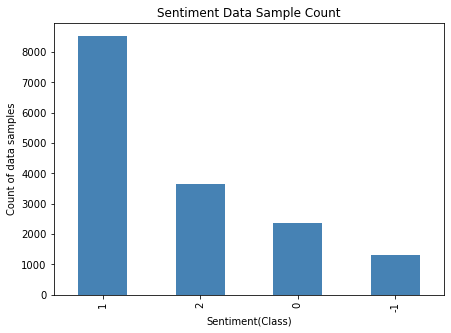

In [77]:
#Plotting sentiment data sample count

plt.figure(figsize=(7,5))
df_train['sentiment'].value_counts().plot(kind = 'bar', title='Sentiment Data Sample Count', color='steelblue')
plt.xlabel('Sentiment(Class)')
plt.ylabel("Count of data samples")
plt.show()

<AxesSubplot:title={'center':'Distribution of sentiment'}, ylabel='sentiment'>

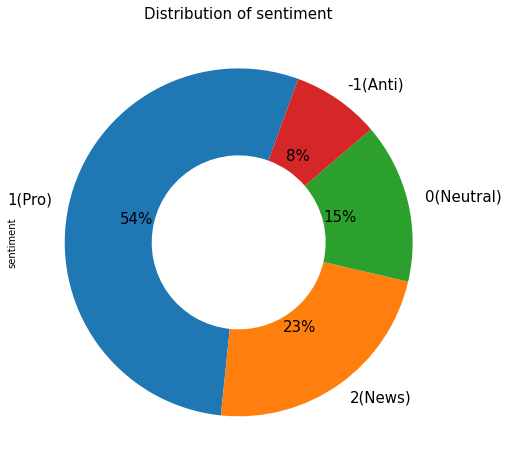

In [78]:
#plotting donut chart to see sentiment distribution

plt.figure(figsize=(10,8))
plt.title('Distribution of sentiment', fontsize=15)
df_train.sentiment.value_counts().plot(kind='pie', labels=['1(Pro)', '2(News)', '0(Neutral)', '-1(Anti)'],
                              wedgeprops=dict(width=.5), autopct='%1.0f%%', startangle= 70, 
                              textprops={'fontsize': 15})

<a id="three.2"></a>
### 3.2 Tweets Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In [79]:
# Splitting the dataset according to sentiment

pro = df_train[df_train['sentiment'] == 1]
anti = df_train[df_train['sentiment'] == -1]
neutral = df_train[df_train['sentiment'] == 0]
news = df_train[df_train['sentiment'] == 2]

In [80]:
# pro rt search 

substring = 'RT'
pro_rt = pro[pro.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
anti_rt = anti[anti.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
neutral_rt = neutral[neutral.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
news_rt = news[news.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]


In [81]:
#combining the retweet data frames into one subdataframe

RT_data = pd.concat([pro_rt, anti_rt, neutral_rt, news_rt])
RT_data.shape

(10628, 3)

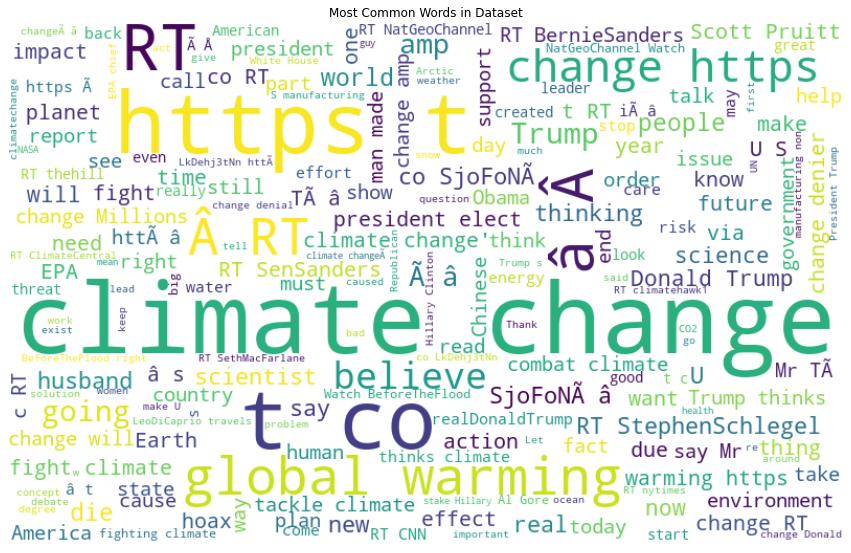

In [82]:
words = ' '.join([text for text in RT_data['message']])
wordcloud = WordCloud(width=800,  height=500, random_state = 21, max_font_size=110, background_color = 'white').generate(words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Most Common Words in Dataset')
plt.show()

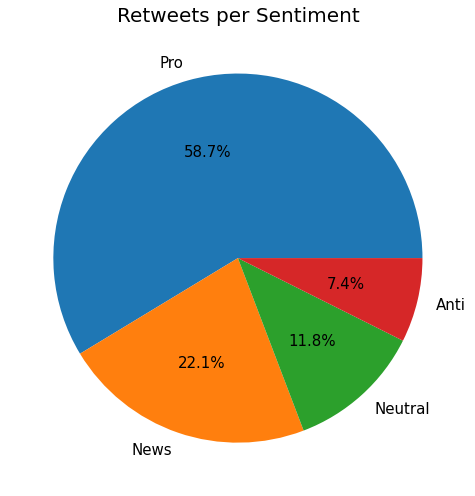

In [83]:
#Plotting pie chart to see sample count of retweets per sentiment

plt.figure(figsize = (7, 7))
plt.pie(RT_data.sentiment.value_counts().values, labels=['Pro', 'News', 'Neutral', 'Anti'], 
        autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Retweets per Sentiment', fontsize=20)
plt.tight_layout()
plt.show()

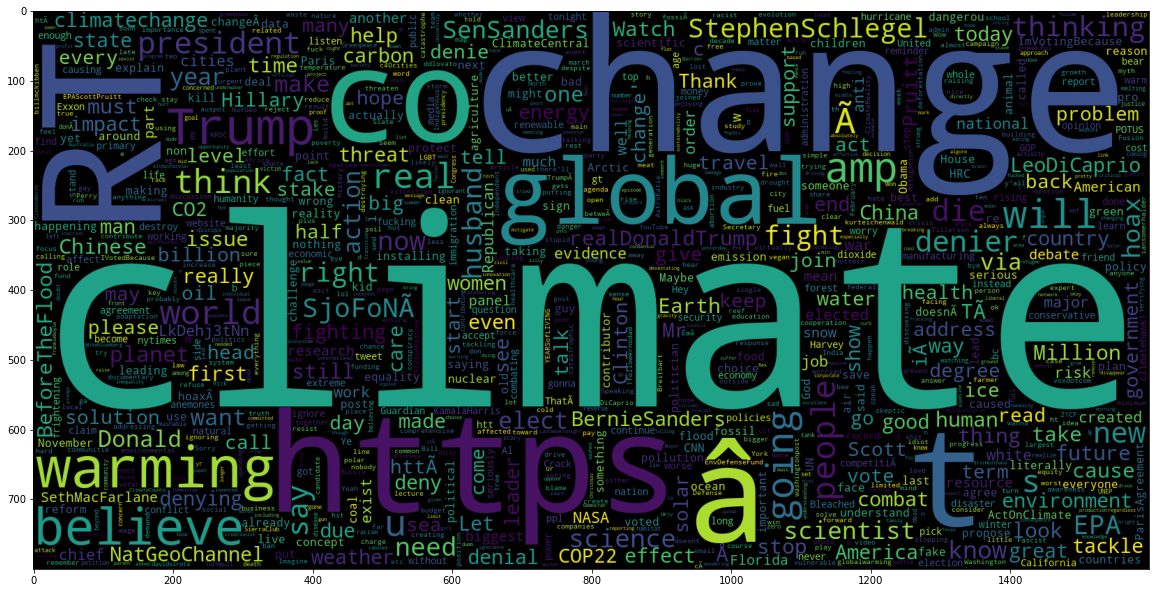

In [84]:
#plotting word cloud for Pro Climate Change tweets
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations = False).generate(" ".join(pro['message']))
plt.imshow(wc)

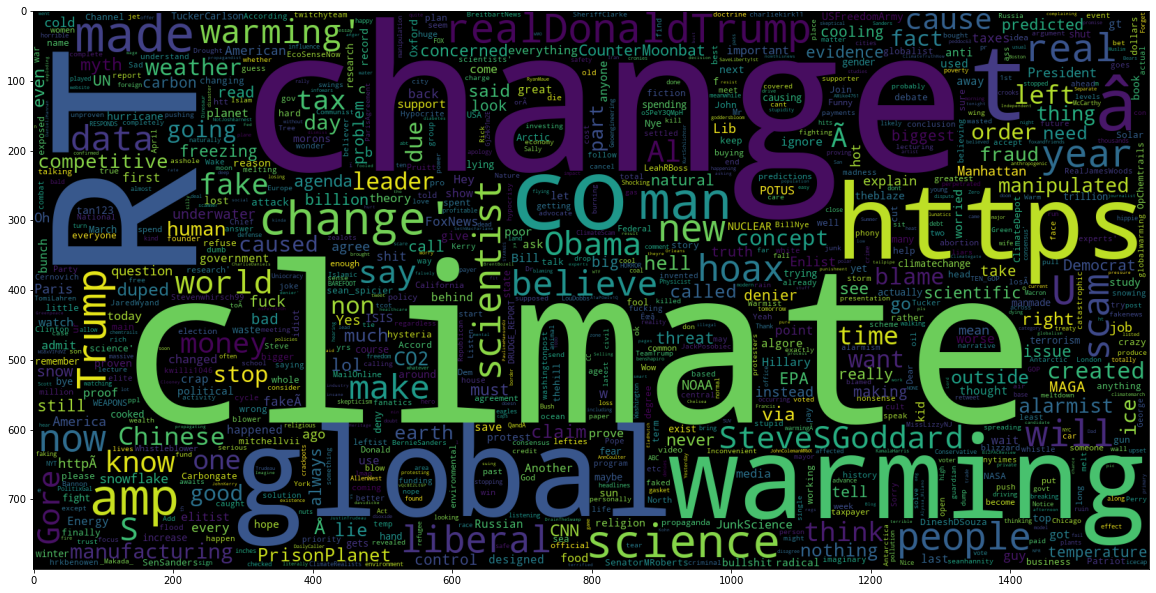

In [85]:
#plotting word cloud for Anti Climate Change tweets
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations = False).generate(" ".join(anti['message']))
plt.imshow(wc)

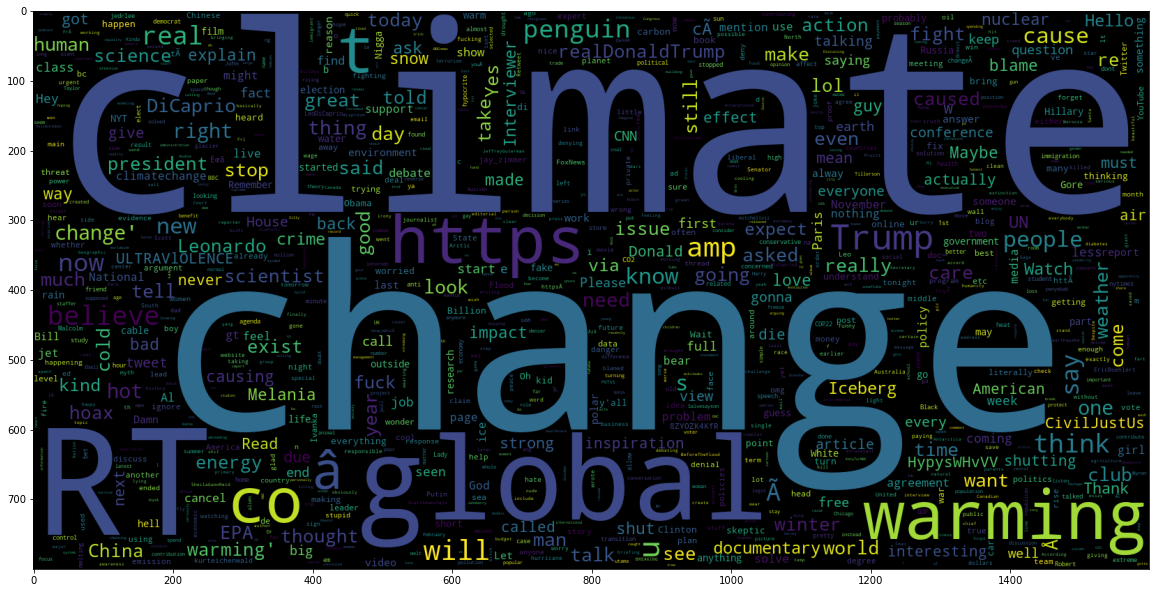

In [86]:
#plotting word cloud for Neutral Climate change tweets
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations = False).generate(" ".join(neutral['message']))
plt.imshow(wc)

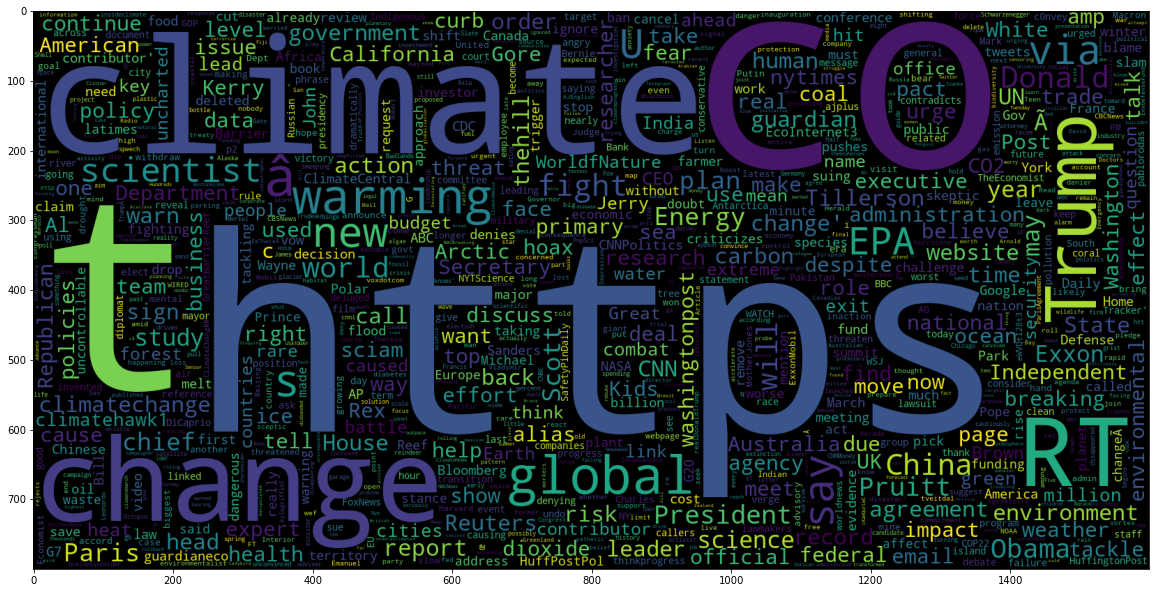

In [87]:
#plotting word cloud for News Climate change tweets
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations = False).generate(" ".join(news['message']))
plt.imshow(wc)

<a id="four"></a>
## 4. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

<a id="four.1"></a>
### 4.1 Text Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


<a id="four.2"></a>
### 4.2 Stopwords Removal
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="four.3"></a>
### 4.3 Text Normalization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


<a id="four.4"></a>
### 4.4 Clean Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


<a id="five"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


<a id="five.1"></a>
### 5.1 Text Feature Extraction
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


<a id="five.2"></a>
### 5.2 Vectorization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


<a id="six"></a>
## 6. Data Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

<a id="ten"></a>
## 10. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---